In [56]:
import pandas as pd
import re
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn Settings
sns.set(style="white", color_codes=True)

In [3]:
#Download the data and put into wine df
wine_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-28/winemag-data-130k-v2.csv")

In [4]:
#check top rows
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
#remove the desciption column
wine_df

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [10]:
#Drop Description
wine_df = wine_df.drop('description', axis=1)

In [11]:
wine_df.isna()

,Unnamed: 0,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,False,False,False,False,False,False,True,True,False,True,False,False,False
129967,False,False,True,False,False,False,False,False,False,False,False,False,False
129968,False,False,False,False,False,False,False,True,False,False,False,False,False
129969,False,False,True,False,False,False,False,True,False,False,False,False,False


In [21]:
#Count the NaNs
wine_df.isnull().sum(axis = 0)

Unnamed: 0                   0
country                      0
designation              37465
points                       0
price                     8996
province                     0
region_1                 21247
region_2                 79460
taster_name                  0
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [20]:
#Replace some NaN values of a selct few number of columns
wine_df['country'].fillna(value='missing', inplace=True)
wine_df['province'].fillna(value='missing', inplace=True)
wine_df['taster_name'].fillna(value='missing', inplace=True)

In [65]:
#get the dates out of a string
#find all returns a list, which may be empty
wine_df['year']=wine_df['title'].apply(lambda x: re.findall(r'\d\d\d\d', x))

In [72]:
wine_df['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

In [71]:
#fill the empties with a 0
wine_df['year']=wine_df['year'].str[0].fillna(0)

In [74]:
#turn the column to an int
wine_df['year']=wine_df['year'].astype(int)

In [73]:
wine_df.head(30)

,Unnamed: 0,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,5,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
6,6,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
7,7,France,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012
8,8,Germany,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013
9,9,France,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [78]:
wine_df.loc[(wine_df['year']>=1990) & (wine_df['year']<2021)]['year']

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 125123, dtype: int32

In [58]:
wine_df['year'].describe()

count    129971.0
mean       2013.0
std           0.0
min        2013.0
25%        2013.0
50%        2013.0
75%        2013.0
max        2013.0
Name: year, dtype: float64

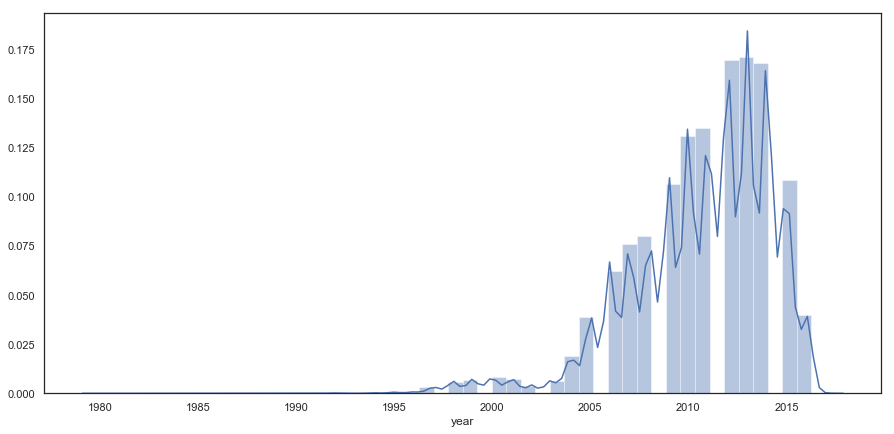

In [88]:
fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(wine_df.loc[(wine_df['year']>=1980) & (wine_df['year']<2021)]['year'], kde=True)

In [85]:
wine_df['year'].unique()

array([2013, 2011, 2012, 2010, 2007, 2009, 2008, 2014, 2015,    0, 2016,
       2004, 2003, 2006, 2001, 2005, 2002, 1887, 2000, 1999, 1991, 1997,
       1996, 1877, 2017, 1995, 1872, 1637, 1868, 1898, 1492, 1998, 7200,
       1852, 1994, 1992, 1840, 1929, 1912, 1875, 1976, 1964, 1848, 1870,
       1856, 1983, 1967, 1990, 1988, 1827, 1860, 1850, 1000, 1980, 1987,
       1989, 1993, 1969, 1882, 1935, 1503, 1821, 1973, 1978, 1965, 1968,
       1947, 1963, 1070, 1985, 1927, 1904, 1847, 1982, 1986, 1752, 1789,
       1607, 1621, 1919, 1957, 1966, 1984, 1961, 1845, 1952, 1150, 1941,
       1974, 3000, 1934, 1945], dtype=int64)